# Projeto da Imersão Dados com Python - Alura
## Este projeto faz parte da Imersão de Dados com Python da Alura e tem como objetivo principal a análise exploratória de um conjunto de dados de salários de profissionais da área de dados.

## Aula 1: Introdução ao Pandas e Carga de Dados no Google Colab
Nesta aula vou carregar arquivos CSV no Google Colab e iniciar a análise de dados com Pandas. Usando comandos simples, para começar a manipular bases reais, preparando os dados para análises mais profundas e identificação de padrões no mercado de trabalho.

### O que farei nesta aula?
* Aprender como carregar arquivos CSV no Google Colab de forma prática.
* Utilizar a biblioteca Pandas para leitura e visualização inicial de dados.
* Manipular dados reais com os principais comandos de análise.

In [ ]:
# Importando a biblioteca Pandas para a manipulação de dados

import pandas as pd

In [ ]:
# Carregando o Conjunto de Dados usando o arquivo CSV diretamente do GitHub usando a biblioteca Pandas.

df= pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')

In [ ]:
#Fazendo a primeira visualização da base de dados
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
#Exibindo informações gerais sobre o DataFrame, como tipos de dados e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
#Agora vai exibir uma descrição um pouco mais aprofundada sobre as informações dessa base de dados
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
#Exibindo o tamanho da base
df.shape

(133349, 11)

In [ ]:
#imprimindo a quantidade de linhas e colunas
linhas, colunas = df.shape[0], df.shape[1]
print(f'O Data Frame tem', linhas, 'linhas' ' e', colunas, 'colunas')

O Data Frame tem 133349 linhas e 11 colunas


In [ ]:
# Checando o nome das colunas
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Traduzindo o nome das colunas para português
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando a tradução dos nomes das colunas no DataFrame
df.rename(columns=renomear_colunas, inplace=True)

#mostrando as colunas
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
# Contando a frequência de cada nível de experiência na base de dados
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
# Contando a frequência de cada tipo de contrato (emprego)
df[('contrato')].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
#  Contando a frequência de cada modalidade de trabalho
# 0 = presencial, 50 = híbrido e 100 = remoto
df[('remoto')].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
# Análisando o tamanho da empresa
df[('tamanho_empresa')].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
# Mapeamento dos valores abreviados para os nomes completos em português
traducao_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

# Aplicando a tradução na coluna 'senioridade'
df['senioridade'] = df['senioridade'].replace(traducao_senioridade)

# Verificando se a tradução foi aplicada com sucesso
df['senioridade'].value_counts()


,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
# Mapeamento dos valores abreviados para os nomes completos na coluna 'contrato'
traducao_contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Meio Período',
    'FL': 'Freelancer',
    'CT': 'Contrato'

}

# Aplicando a tradução na coluna 'contrato'
df['contrato'] = df['contrato'].replace(traducao_contrato)

# Verificando se a tradução foi aplicada com sucesso
df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Meio Período,376
Freelancer,16


In [ ]:
# Mapeamento dos valores abreviados para os nomes completos na coluna 'tamanho_empresa'
traducao_tamanho = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

# Aplicando a tradução na coluna 'tamanho_empresa'
df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho)

# Verificando se a tradução foi aplicada com sucesso
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [ ]:
# Mapeamento dos valores numéricos para os nomes completos na coluna 'remoto'
traducao_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

# Aplicando a tradução na coluna 'remoto'
df['remoto'] = df['remoto'].replace(traducao_remoto)

# Verificando se a tradução foi aplicada com sucesso
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
# Exibindo as primeiras 5 linhas do DataFrame atualizado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
# Exibindo estatísticas descritivas para as colunas categóricas (texto)
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


## Aula 2: Tratamento de Dados e Análise Estruturada

### O que terá nessa aula?
Nesta aula, vou tratar dados de forma mais estruturada, preparando a base para análises mais assertivas. O foco está em identificar e lidar com dados faltantes, organizar colunas, aplicar filtros e gerar estatísticas descritivas que ajudam a entender melhor os dados e extrair insights relevantes.

### O que farei nesta aula?
* Aprender técnicas para renomear colunas de maneira clara e organizada.
* Identificar e tratar dados faltantes em bases reais.
* Aplicar filtros simples para selecionar informações relevantes.
* Gerar estatísticas descritivas que apoiam a análise e tomada de decisão.

In [ ]:
# Verificando a presença de valores nulos no DataFrame
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
# Contando a quantidade de valores nulos por coluna
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
# Listando todos os anos únicos presentes no DataFrame
df[('ano')].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
# Exibindo as linhas que contêm valores nulos
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


### Demonstração: Tratando Dados Faltantes em Colunas Numéricas e de Texto. Esta opção é um pouco mais detalhada, explicando que você está mostrando como o fillna() funciona para diferentes tipos de dados.

In [ ]:
# Importando a biblioteca numpy para lidar com valores nulos (np.nan)
import numpy as np

# Criando um DataFrame de exemplo para demonstração
df_salarios = pd.DataFrame ({
    'nome':  ['Ana', 'Vanessa', 'Joao', 'Carla', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000 ]
})

'''Preenchendo os valores nulos da coluna 'salario' com a média dos salários
O .mean() calcula a média dos salários e o .round(2) arredonda o valor'''
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

'''Preenchendo os valores nulos da coluna 'salario' com a mediana
 A mediana é o valor do meio e é menos sensível a outliers (valores extremos)'''
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

# Visualizando o DataFrame para ver o resultado
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Vanessa,NaN,36333.33,5000.0
2,Joao,5000.0,5000.00,5000.0
3,Carla,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [ ]:
# Criando um DataFrame de exemplo com dados de cidades
df_cidades = pd.DataFrame ({
    'nome':  ['Ana', 'Vanessa', 'Joao', 'Carla', 'Val'],
    'cidades': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

'''Preenchendo os valores nulos da coluna 'cidades' com a string 'Não informado.
Essa é uma forma comum de tratar dados faltantes em colunas de texto'''
df_cidades['cidade_preenchida'] = df_cidades['cidades'].fillna('Não informado')

# Exibindo o DataFrame para ver o resultado
df_cidades


,nome,cidades,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Vanessa,NaN,Não informado
2,Joao,Curitiba,Curitiba
3,Carla,NaN,Não informado
4,Val,Belém,Belém


###Continuando a Análise na Base de Dados Limpa

In [ ]:
# Removendo todas as linhas que contêm valores nulos
df_limpos = df.dropna()

In [ ]:
# Verificando se restaram valores nulos no novo DataFrame
df_limpos.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
# Visualizando as primeiras linhas do DataFrame limpo
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
# Informações da base
df_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
# Convertendo o tipo de dado da coluna 'ano' de float (ex: 2025.0) para inteiro (ex: 2025)
df_limpos = df_limpos.assign(ano = df_limpos['ano'].astype('int64'))

## Aula 3: Criando Gráficos

### O que terá nessa aula?
Nesta aula, vou criar gráficos para visualizar e explorar informações presentes nos dados. Também vou explorar diferentes tipos de gráficos estatísticos como: histogramas, boxplots e gráficos de barras. Esse passo é importante para identificar padrões, facilitar a interpretação e comunicar os resultados de forma mais clara.

### O que farei nessa aula?
* Criar gráficos estatísticos para analisar os dados de forma visual.
* Construir histogramas para observar a distribuição das informações.
* Utilizar bibliotecas de Python que ajudam na criação de gráficos.
* Praticar a visualização de dados para apoiar a análise e tomada de decisões.

In [ ]:
# Checando as primeiras linhas dos dados
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

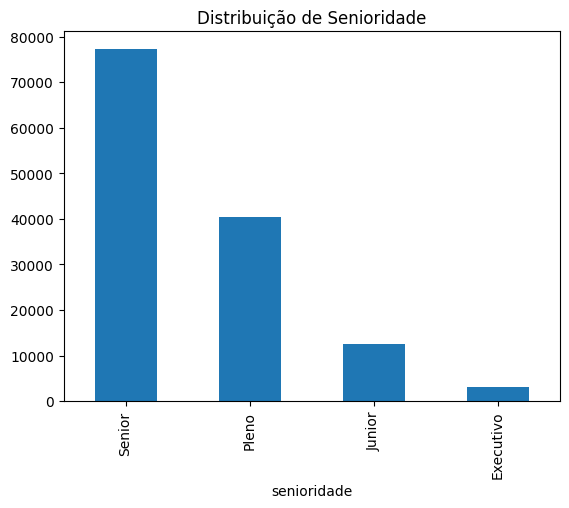

In [ ]:
# Contagem e visualização da frequência de cada nível de senioridade
df_limpos['senioridade'].value_counts().plot(kind='bar',title='Distribuição de Senioridade')


In [ ]:
# Importando a biblioteca Seaborn para visualização de dados estatísticos
import seaborn as sns


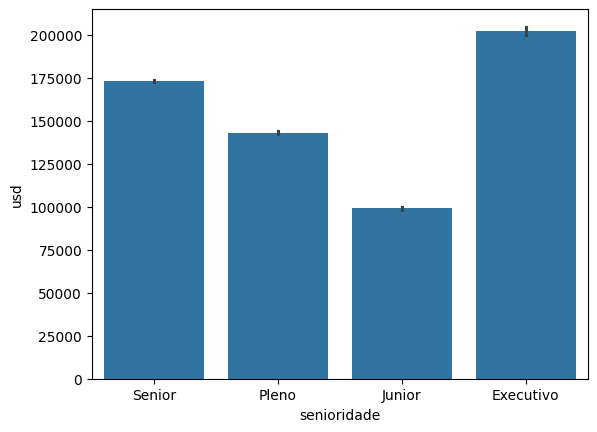

In [ ]:
# Gráfico de barras para visualizar a média salarial por nível de senioridade
sns.barplot(data=df_limpos,x='senioridade',y='usd')

#Exibindo o gráfico
plt.show()

In [ ]:
# Importando a biblioteca Matplotlib para criar visualizações
import matplotlib.pyplot as plt


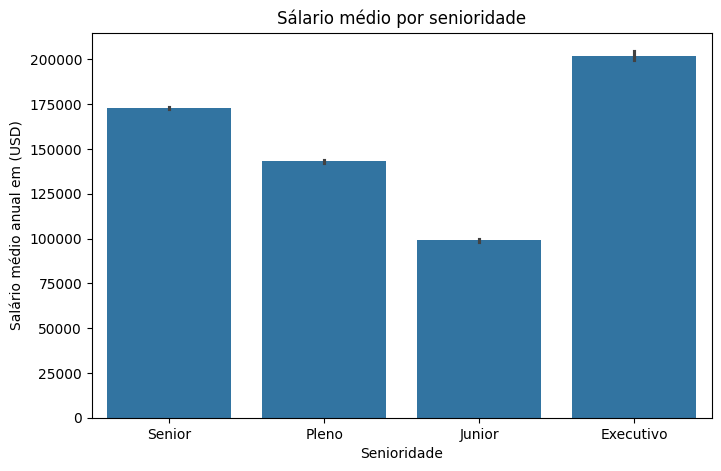

In [ ]:
# Definindo tamanho da figura (largura, altura)
plt.figure(figsize=(8, 5))

# Gráfico de barras para visualizar a média salarial por nível de senioridade
sns.barplot(data=df_limpos,x='senioridade',y='usd')

# Definindo o título do gráfico
plt.title('Sálario médio por senioridade')

# Definindo o rótulo do eixo X
plt.xlabel('Senioridade')

# Definindo o rótulo do eixo Y
plt.ylabel('Salário médio anual em (USD)')

# Exibindo o gráfico
plt.show()

In [ ]:
# Calculando a média salarial por nível de senioridade e ordenando os resultados
df_limpos.groupby('senioridade')['usd'].mean().sort_values(ascending=False)


,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
# Definindo a ordem das categorias de senioridade com base no salário médio (do maior para o menor)
ordem = df_limpos.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

# Exibindo
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

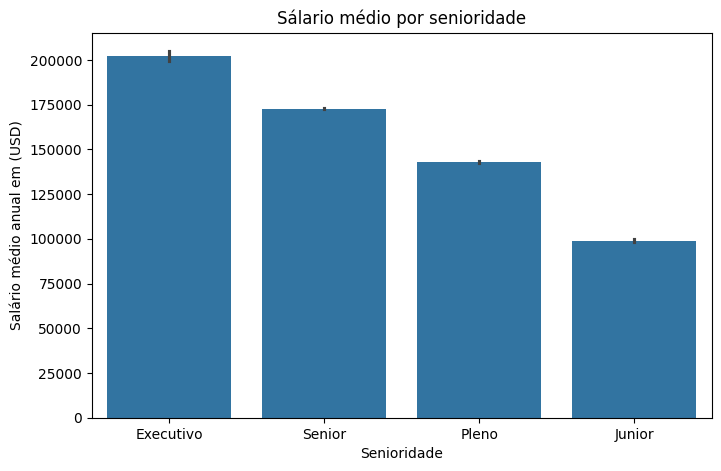

In [ ]:
# Definindo tamanho da figura (largura, altura)
plt.figure(figsize=(8, 5))

'''Gráfico de barras para visualizar a média salarial por nível de senioridade.
O parâmetro 'order' foi adicionado para exibir os dados em uma ordem específica'''
sns.barplot(data=df_limpos,x='senioridade',y='usd', order=ordem)

# Definindo o título do gráfico
plt.title('Sálario médio por senioridade')

# Definindo o rótulo do eixo X
plt.xlabel('Senioridade')

# Definindo o rótulo do eixo Y
plt.ylabel('Salário médio anual em (USD)')

# Exibindo o gráfico
plt.show()

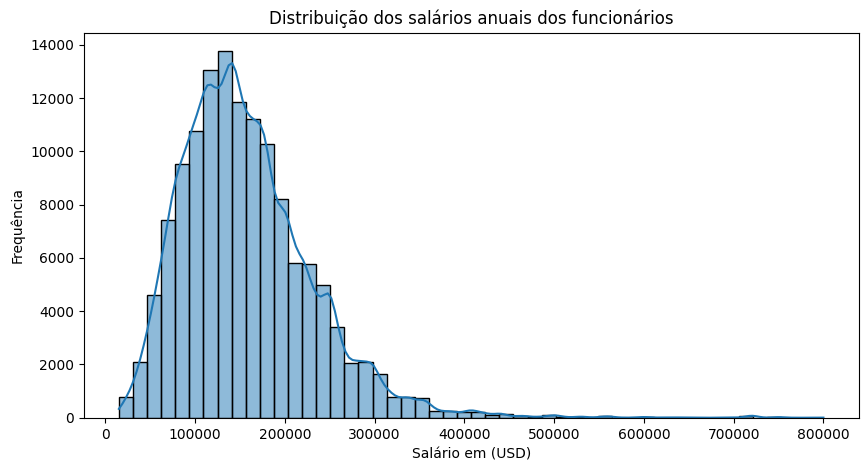

In [ ]:
# Definindo tamanho da figura (largura, altura)
plt.figure(figsize=(10, 5))

# Gráfico de histograma para visualizar a distribuição salarial dos funcionários
sns.histplot(df_limpos['usd'], bins = 50, kde=True)

# Definindo o título do gráfico
plt.title('Distribuição dos salários anuais dos funcionários')

# Definindo o rótulo do eixo X
plt.xlabel('Salário em (USD)')

# Definindo o rótulo do eixo Y
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()




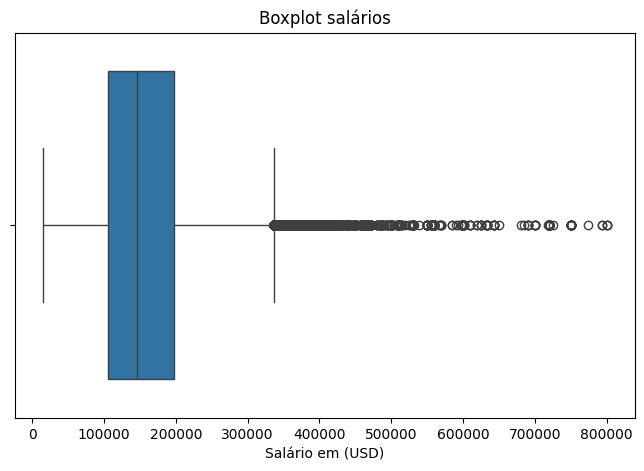

In [ ]:
# Definindo tamanho da figura (largura, altura)
plt.figure(figsize=(8, 5))

# Gráfico de boxplot para visualizar a distribuição salarial dos funcionários
# O boxplot é útil para identificar a mediana, quartis e outliers (salários extremos)
sns.boxplot(x=df_limpos['usd'])

#Titulo do gráfico
plt.title('Boxplot salários')

# Definindo o rótulo do eixo X
plt.xlabel('Salário em (USD)')

# Exibindo o gráfico
plt.show()


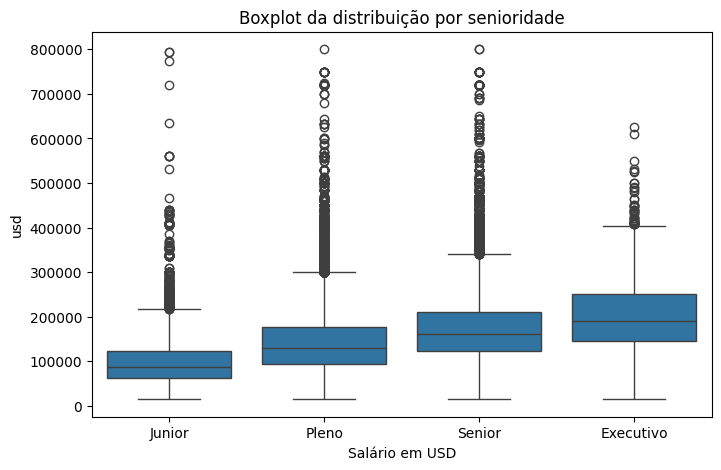

In [ ]:
# Definindo a ordem das categorias de senioridade para o gráfico
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

# Definindo tamanho da figura (largura, altura)
plt.figure(figsize=(8, 5))

''' Criando um boxplot para comparar a distribuição salarial por nível de senioridade.
O parâmetro 'order' garante que a ordem das categorias seja a definida acima'''
sns.boxplot(x='senioridade', y='usd', data=df_limpos, order=ordem_senioridade)

#
plt.title('Boxplot da distribuição por senioridade')

# Definindo o rótulo do eixo X
plt.xlabel('Salário em USD')

# Exibindo o gráfico
plt.show()


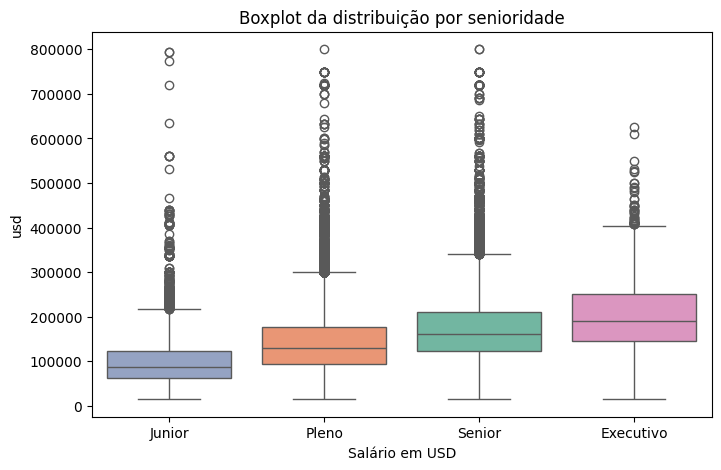

In [ ]:
# Definindo a ordem das categorias de senioridade para o gráfico
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

# Definindo tamanho da figura (largura, altura)
plt.figure(figsize=(8, 5))

''' Criando um boxplot para comparar a distribuição salarial por nível de senioridade.
O parâmetro 'order' garante que a ordem das categorias seja a definida acima.
Adicionando cores distintas para cada nível de senioridade usando 'palette' e 'hue' '''
sns.boxplot(x='senioridade', y='usd', data=df_limpos, order=ordem_senioridade, palette='Set2',hue='senioridade')

#
plt.title('Boxplot da distribuição por senioridade')

# Definindo o rótulo do eixo X
plt.xlabel('Salário em USD')

# Exibindo o gráfico
plt.show()

In [ ]:
# Importando a biblioteca Plotly Express para criar gráficos interativos
import plotly.express as px

# Calculando a média salarial por senioridade, ordenando os resultados de forma decrescente e resetando o índice para usar no gráfico
senioridade_media_salarial = df_limpos.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

# Criando um gráfico de barras interativo com o Plotly
fig = px.bar(senioridade_media_salarial,
             x='senioridade',
             y='usd',
             title='Média salarial por senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial anual(USD)'})

# Exibindo o gráfico
fig.show()


In [ ]:
#Contando a frequência de cada tipo de trabalho ('remoto', 'híbrido', 'presencial')
remoto_contagem = df_limpos['remoto'].value_counts().reset_index()

# Renomeando as colunas do DataFrame para 'tipo_trabalho' e 'quantidade'
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

# Criando um gráfico de pizza com Plotly Express
fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='proporção do tipo de trabalho'

             )

# Exibindo o gráfico
fig.show()


In [ ]:
#Contando a frequência de cada tipo de trabalho ('remoto', 'híbrido', 'presencial')
remoto_contagem = df_limpos['remoto'].value_counts().reset_index()

# Renomeando as colunas do DataFrame para 'tipo_trabalho' e 'quantidade'
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

# Criando um gráfico de rosca com Plotly Express
fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='proporção do tipo de trabalho',
             hole=0.5

             )
# Exibindo a porcentagem rótulo
fig.update_traces(textinfo='percent+label')

# Exibindo o gráfico
fig.show()

In [ ]:
# Mapeia os códigos de país para os nomes completos.
pip install pycountry

In [ ]:
# importando essa biblioteca, garante que a visualização no dashboard seja mais clara e fácil de entender.
import pycountry

In [ ]:
# --- Visualização de Salários no Mapa ---

# Função para converter o código do país de 2 para 3 letras (ISO-2 para ISO-3)
def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except AttributeError:
    return None

# Aplica a função para criar uma nova coluna com o código ISO-3
df_limpos['residencia_iso3'] = df_limpos['residencia'].apply(iso2_to_iso3)

# Filtra o DataFrame para pegar apenas os registros de 'Data Scientist'
df_ds = df_limpos[df_limpos['cargo'] == 'Data Scientist']

#Agrupa por país e calcula a média salarial para o mapa
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Cria o mapa coroplético com Plotly Express
fig = px.choropleth(media_ds_pais,
        locations='residencia_iso3',
        color='usd',
        color_continuous_scale='rdylgn',
        title='Salário médio de Ciêntista de Dados por País',
        labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'}
    )

# Exibir o mapa
fig.show()

In [ ]:
# Exibir 5 primeiras linhas
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [ ]:
'''Salvar o DataFrame df_limpos em um novo arquivo CSV.
index=False: Este é um parâmetro crucial. Ele informa ao Pandas para não salvar o índice do DataFrame como uma coluna no arquivo CSV.'''
df_limpos.to_csv('dados-imersao-final.csv', index=False)

# Aula 4 - Construindo Dashboard Interativo

### O que terá nessa aula?
Nesta aula, terá a biblioteca Streamlit e aprender a criar um dashboard interativo de forma prática. Com ele, será possível visualizar dados, aplicar filtros e gerar gráficos em tempo real, facilitando a análise e a apresentação das informações.

### O que farei nessa aula?
* Conhecer a biblioteca Streamlit para criar dashboards interativos.
* Desenvolver interfaces simples para visualização de dados.
* Aplicar filtros dinâmicos para explorar os dados em tempo real.
* Gerar gráficos direto no dashboard para facilitar a análise.

### Observação: A partir daqui, este código foi desenvolvido para ser executado no VS Code, usando o ambiente virtual configurado com as bibliotecas instaladas. A etapa de construção e execução do aplicativo Streamlit será feita diretamente no VS Code, mas também deixarei o código disponivél aqui.


In [ ]:
# Importando as bibliotecas essenciais para o projeto de análise de dados.
''' A biblioteca Streamlit é usada para criar dashboards e aplicativos web.Pandas é a principal biblioteca para manipulação e análise de dados tabulares.
Plotly Express é uma parte da biblioteca Plotly que simplifica a criação de gráficos interativos e visualizações de dados interativos'''
import streamlit as st
import pandas as pd
import plotly.express as px

In [ ]:
#Configuração da Página

# Define configurações básicas da página, deve ser a primeira chamada do script.
st.set_page_config(
    page_title="Dashboard de Salários na Área de Dados", # Título que aparece na aba do navegador.
    page_icon="📊", # Ícone da aba do navegador (emoji).
    layout="wide", # Layout da página: 'wide' usa a largura total da tela.
)

In [ ]:
#Carregamento dos dados
df = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")

In [ ]:
#-- Barra Lateral (Filtros)--
st.sidebar.header("🔍 Filtros")

#Filtro de Ano
anos_disponiveis = sorted(df['ano'].unique())
anos_selecionados = st.sidebar.multiselect("Ano", anos_disponiveis, default=anos_disponiveis)

#Filtro de Senioridade
senioridades_disponiveis = sorted(df['senioridade'].unique())
senioridades_selecionadas = st.sidebar.multiselect("Senioridade", senioridades_disponiveis, default=senioridades_disponiveis)

#Filtro por Tipo de Contrato
contratos_disponiveis = sorted(df['contrato'].unique())
contratos_selecionados = st.sidebar.multiselect("Tipo de Contrato", contratos_disponiveis, default=contratos_disponiveis)

#Filtro por Tamanho da Empresa
tamanhos_disponiveis = sorted(df['tamanho_empresa'].unique())
tamanhos_selecionados = st.sidebar.multiselect("Tamanho da Empresa", tamanhos_disponiveis, default=tamanhos_disponiveis)

# --- Filtragem do DataFrame ---
#O dataframe principal é filtrado com base nas seleções feitas na barra lateral.
df_filtrado = df[
    (df['ano'].isin(anos_selecionados)) &
    (df['senioridade'].isin(senioridades_selecionadas)) &
    (df['contrato'].isin(contratos_selecionados)) &
    (df['tamanho_empresa'].isin(tamanhos_selecionados))
]

# --- Conteúdo Principal ---
st.title("🎲 Dashboard de Análise de Salários na Área de Dados")
st.markdown("Explore os dados salariais na área de dados nos últimos anos. Utilize os filtros à esquerda para refinar sua análise.")

# --- Métricas Principais (KPIs) ---
st.subheader("Métricas gerais (Salário anual em USD)") #Esta linha cria um título de nível 2
if not df_filtrado.empty:
    salario_medio = df_filtrado['usd'].mean()
    salario_maximo = df_filtrado['usd'].max()
    total_registros = df_filtrado.shape[0]
    cargo_mais_frequente = df_filtrado["cargo"].mode()[0]
else:
    salario_medio, salario_mediano, salario_maximo, total_registros, cargo_mais_comum = 0, 0, 0, ""

col1, col2, col3, col4 = st.columns(4) #Esta linha cria quatro colunas no seu dashboard
col1.metric("Salário médio", f"${salario_medio:,.0f}")
col2.metric("Salário máximo", f"${salario_maximo:,.0f}")
col3.metric("Total de registros", f"{total_registros:,}")
col4.metric("Cargo mais frequente", cargo_mais_frequente)

st.markdown("---") #Esta linha adiciona uma linha horizontal

# --- Análises Visuais com Plotly ---
st.subheader("Gráficos")

# Cria duas colunas para os dois primeiros gráficos
col_graf1, col_graf2 = st.columns(2)

# Bloco do primeiro gráfico (barra horizontal)
with col_graf1:
    # Verifica se há dados para evitar erros
    if not df_filtrado.empty:
        # Prepara os dados: calcula a média salarial para os 10 cargos mais altos
        top_cargos = df_filtrado.groupby('cargo')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()

        # Cria o gráfico de barras com Plotly Express
        grafico_cargos = px.bar(
            top_cargos,
            x='usd', y='cargo',
            orientation='h',
            title="Top 10 cargos por salário médio",
            labels={'usd': 'Média salarial anual (USD)', 'cargo': ''}
        )

        # Ajusta o layout do gráfico
        grafico_cargos.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})

        # Exibe o gráfico no Streamlit
        st.plotly_chart(grafico_cargos, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de cargos.")

# Bloco do segundo gráfico (histograma)
with col_graf2:
    if not df_filtrado.empty:
        # Cria um histograma para mostrar a distribuição dos salários
        grafico_hist = px.histogram(
            df_filtrado,
            x='usd',
            nbins=30,
            title="Distribuição de salários anuais",
            labels={'usd': 'Faixa salarial (USD)', 'count': ''}
        )
        # Ajusta o layout do gráfico
        grafico_hist.update_layout(title_x=0.1)
        # Exibe o gráfico no Streamlit
        st.plotly_chart(grafico_hist, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de distribuição.")

# Cria uma nova linha com duas colunas para o terceiro gráfico (e uma vazia)
col_graf3, col_graf4 = st.columns(2)

# Bloco do terceiro gráfico (pizza/rosca)
with col_graf3:
    if not df_filtrado.empty:
        # Prepara os dados: conta a quantidade de cada tipo de trabalho (remoto ou não)
        remoto_contagem = df_filtrado['remoto'].value_counts().reset_index()
        remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

        # Cria o gráfico de pizza (rosca) com Plotly
        grafico_remoto = px.pie(
            remoto_contagem,
            names='tipo_trabalho',
            values='quantidade',
            title='Proporção dos tipos de trabalho',
            hole=0.5  # Cria um gráfico de rosca
        )
        # Formata o texto do gráfico para mostrar a porcentagem
        grafico_remoto.update_traces(textinfo='percent+label')
        # Ajusta o layout do gráfico
        grafico_remoto.update_layout(title_x=0.1)
        # Exibe o gráfico no Streamlit
        st.plotly_chart(grafico_remoto, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico dos tipos de trabalho.")

        # Bloco do gráfico 4 (mapa de salários)
with col_graf4:
    if not df_filtrado.empty:
        # Filtra o DataFrame para criar um mapa apenas para Cientistas de Dados
        df_ds = df_filtrado[df_filtrado['cargo'] == 'Data Scientist']

        # Calcula a média salarial de Cientistas de Dados por país
        media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

        # Cria o mapa coroplético com o Plotly
        grafico_paises = px.choropleth(media_ds_pais,
            locations='residencia_iso3',
            color='usd',
            color_continuous_scale='rdylgn',
            title='Salário médio de Cientista de Dados por país',
            labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

        # Ajusta a posição do título do mapa
        grafico_paises.update_layout(title_x=0.1)

        # Exibe o mapa no Streamlit
        st.plotly_chart(grafico_paises, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de países.")

# --- Tabela de Dados Detalhados ---
st.subheader("Dados Detalhados")
# Exibe o DataFrame filtrado como uma tabela interativa no dashboard
st.dataframe(df_filtrado)

In [ ]:
!pip install streamlit